In [1]:
import pandas as pd
import matplotlib as ml
import numpy as np
import math as mt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',20)

In [2]:
data=pd.read_csv("C:/Users/Roger/OneDrive/ESPECIAL/IA006/python/daily-minimum-temperatures.csv")
# data.head(20)
#data.tail(20)
# data.isna()
data.dtypes
data=data.sort_values('Date')
data['Date'] = pd.to_datetime(data['Date'])
data['Year']=data['Date'].dt.year
data=data[['Year','Date','Temp']]
print(data.head(5))
print(data.tail(5))

   Year       Date  Temp
0  1981 1981-01-01  20.7
1  1981 1981-01-02  17.9
2  1981 1981-01-03  18.8
3  1981 1981-01-04  14.6
4  1981 1981-01-05  15.8
      Year       Date  Temp
3645  1990 1990-12-27  14.0
3646  1990 1990-12-28  13.6
3647  1990 1990-12-29  13.5
3648  1990 1990-12-30  15.7
3649  1990 1990-12-31  13.0


In [5]:
#cria os dados com supervisão
data_windowed=data.copy()
data_windowed['C']=1
for k in range(1,31) :
     colum_name='T-'+str(k)
     data_windowed[colum_name]=data['Temp'].shift(k)
    #elimina os 30 primeiros dias q não há como prever
data_windowed = data_windowed.iloc[30:]
print(data_windowed.head(10))
print(data_windowed.tail(10))
data_windowed.describe()


    Year       Date  Temp  C   T-1   T-2   T-3   T-4   T-5   T-6  ...  T-21  \
30  1981 1981-01-31  15.4  1  15.1  15.5  17.2  19.4  18.7  16.5  ...  20.0   
31  1981 1981-02-01  15.3  1  15.4  15.1  15.5  17.2  19.4  18.7  ...  16.2   
32  1981 1981-02-02  18.8  1  15.3  15.4  15.1  15.5  17.2  19.4  ...  13.3   
33  1981 1981-02-03  21.9  1  18.8  15.3  15.4  15.1  15.5  17.2  ...  16.7   
34  1981 1981-02-04  19.9  1  21.9  18.8  15.3  15.4  15.1  15.5  ...  21.5   
35  1981 1981-02-05  16.6  1  19.9  21.9  18.8  15.3  15.4  15.1  ...  25.0   
36  1981 1981-02-06  16.8  1  16.6  19.9  21.9  18.8  15.3  15.4  ...  20.7   
37  1981 1981-02-07  14.6  1  16.8  16.6  19.9  21.9  18.8  15.3  ...  20.6   
38  1981 1981-02-08  17.1  1  14.6  16.8  16.6  19.9  21.9  18.8  ...  24.8   
39  1981 1981-02-09  25.0  1  17.1  14.6  16.8  16.6  19.9  21.9  ...  17.7   

    T-22  T-23  T-24  T-25  T-26  T-27  T-28  T-29  T-30  
30  21.8  17.4  15.8  15.8  15.8  14.6  18.8  17.9  20.7  
31  20.0  21

,Year,Temp,C,T-1,T-2,T-3,T-4,T-5,T-6,T-7,...,T-21,T-22,T-23,T-24,T-25,T-26,T-27,T-28,T-29,T-30
count,3620.000000,3620.000000,3620.0,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,...,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000
mean,1985.537293,11.122956,1.0,11.123536,11.123481,11.124503,11.126105,11.127403,11.127928,11.128785,...,11.147928,11.150912,11.151823,11.151906,11.150912,11.149696,11.148066,11.148481,11.148950,11.151022
std,2.855068,4.034226,0.0,4.034647,4.034586,4.035657,4.037791,4.039470,4.040045,4.040749,...,4.068582,4.072432,4.073461,4.073553,4.071978,4.069932,4.067367,4.068070,4.068752,4.071705
min,1981.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1983.000000,8.300000,1.0,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,...,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000
50%,1986.000000,11.000000,1.0,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,1988.000000,13.900000,1.0,13.900000,13.900000,13.900000,13.900000,13.900000,13.900000,13.900000,...,13.900000,13.900000,13.900000,13.900000,13.900000,13.900000,13.900000,13.900000,13.900000,13.900000
max,1990.000000,26.300000,1.0,26.300000,26.300000,26.300000,26.300000,26.300000,26.300000,26.300000,...,26.300000,26.300000,26.300000,26.300000,26.300000,26.300000,26.300000,26.300000,26.300000,26.300000


In [37]:
for ano in range(1981,1991):
    print(ano)
    data_train=data_windowed[data_windowed['Year']!=ano].copy()
    data_test=data_windowed[data_windowed['Year']==ano].copy()
    x_train=data_train.iloc[:,3:34].copy()
    y_train=data_train['Temp'].copy()
    x_test=data_test.iloc[:,3:34].copy()
    y_test=data_test['Temp'].copy()
    model = LinearRegression()
    model.fit(x_train,y_train)
    y_train_estimado=model.predict(x_train)
    print("erro treino {}".format(mt.sqrt(mean_squared_error(y_train_estimado,y_train))))
    y_test_estimado=model.predict(x_test)
    print("erro teste {}".format(mt.sqrt(mean_squared_error(y_test_estimado,y_test))))

1981
erro treino 2.3950733795682644
erro teste 2.395415791820084
1982
erro treino 2.3630117013171366
erro teste 2.680088597647602
1983
erro treino 2.382853914906737
erro teste 2.5101078296233608
1984
erro treino 2.3820921201245295
erro teste 2.5098025488904967
1985
erro treino 2.3977623829837946
erro teste 2.369084712735401
1986
erro treino 2.3942045020458838
erro teste 2.4049666157759537
1987
erro treino 2.395037705657323
erro teste 2.4011237050231795
1988
erro treino 2.3916276661832074
erro teste 2.42432180164432
1989
erro treino 2.4198318300660926
erro teste 2.16140111764603
1990
erro treino 2.408973471425526
erro teste 2.2655007149453588


    C   T-1   T-2   T-3   T-4   T-5   T-6   T-7   T-8   T-9  ...  T-21  T-22  \
30  1  15.1  15.5  17.2  19.4  18.7  16.5  16.0  14.4  12.1  ...  20.0  21.8   
31  1  15.4  15.1  15.5  17.2  19.4  18.7  16.5  16.0  14.4  ...  16.2  20.0   

    T-23  T-24  T-25  T-26  T-27  T-28  T-29  T-30  
30  17.4  15.8  15.8  15.8  14.6  18.8  17.9  20.7  
31  21.8  17.4  15.8  15.8  15.8  14.6  18.8  17.9  

[2 rows x 31 columns]
30    15.4
31    15.3
Name: Temp, dtype: float64
      C   T-1   T-2   T-3   T-4   T-5   T-6   T-7   T-8   T-9  ...  T-21  \
3285  1  12.7  14.4  10.4  11.7  13.3  16.0  16.4  12.7  12.0  ...  16.2   
3286  1  14.8  12.7  14.4  10.4  11.7  13.3  16.0  16.4  12.7  ...  14.8   

      T-22  T-23  T-24  T-25  T-26  T-27  T-28  T-29  T-30  
3285  18.7  14.1  16.5  16.0  14.1  10.6  13.3  13.7  18.3  
3286  16.2  18.7  14.1  16.5  16.0  14.1  10.6  13.3  13.7  

[2 rows x 31 columns]
3285    14.8
3286    13.3
Name: Temp, dtype: float64


2.408973471425526
2.2655007149453588


Relatorio para 2 folders.
O número de atrasos que gerou o menor erro de validação foi:25
Erro Treino:2.4349943956749764
Erro Validação:2.4045999847054693
Erro Teste:2.2774924602015902
Folder:2
<function show at 0x0D3054B0>
2
25
2.4045999847054693
2.2774924602015902
           Date  Temp  Temp Estimada
3285 1990-01-01  14.8      12.777984
3286 1990-01-02  13.3      14.074312
3287 1990-01-03  15.6      13.115601
3288 1990-01-04  14.5      14.341987
3289 1990-01-05  14.3      13.978096
3290 1990-01-06  15.3      13.892202
3291 1990-01-07  16.4      14.609854
3292 1990-01-08  14.8      15.074391
3293 1990-01-09  17.4      14.128566
3294 1990-01-10  18.8      15.721625
3295 1990-01-11  22.1      16.330324
3296 1990-01-12  19.0      18.400473
3297 1990-01-13  15.5      16.871168
3298 1990-01-14  15.8      15.244844
3299 1990-01-15  14.7      16.136526
3300 1990-01-16  10.7      14.827421
3301 1990-01-17  11.5      13.069757
3302 1990-01-18  15.0      13.296666
3303 1990-01-19  14.5      15.4

<function show at 0x0D3054B0>
Relatorio para 4 folders.
O número de atrasos que gerou o menor erro de validação foi:17
Erro Treino:2.438894276476141
Erro Validação:2.3594549756030845
Erro Teste:2.264015177737853
Folder:2
<function show at 0x0D3054B0>
2
17
2.3594549756030845
2.264015177737853
           Date  Temp  Temp Estimada
3285 1990-01-01  14.8      12.598706
3286 1990-01-02  13.3      14.067952
3287 1990-01-03  15.6      12.989671
3288 1990-01-04  14.5      14.701231
3289 1990-01-05  14.3      13.666345
3290 1990-01-06  15.3      13.662337
3291 1990-01-07  16.4      14.397481
3292 1990-01-08  14.8      15.046011
3293 1990-01-09  17.4      13.961063
3294 1990-01-10  18.8      15.921753
3295 1990-01-11  22.1      16.465988
3296 1990-01-12  19.0      18.676109
3297 1990-01-13  15.5      16.384507
3298 1990-01-14  15.8      15.125817
3299 1990-01-15  14.7      15.612974
3300 1990-01-16  10.7      15.165481
3301 1990-01-17  11.5      12.743540
3302 1990-01-18  15.0      13.641150
3303

<function show at 0x0D3054B0>
Relatorio para 8 folders.
O número de atrasos que gerou o menor erro de validação foi:16
Erro Treino:2.4416193509864
Erro Validação:2.2789086909322007
Erro Teste:2.258978168335079
Folder:6
<function show at 0x0D3054B0>
6
16
2.2789086909322007
2.258978168335079
           Date  Temp  Temp Estimada
3285 1990-01-01  14.8      12.651414
3286 1990-01-02  13.3      14.124337
3287 1990-01-03  15.6      13.055819
3288 1990-01-04  14.5      14.597327
3289 1990-01-05  14.3      13.479808
3290 1990-01-06  15.3      13.815600
3291 1990-01-07  16.4      14.385861
3292 1990-01-08  14.8      15.197855
3293 1990-01-09  17.4      14.029529
3294 1990-01-10  18.8      16.049141
3295 1990-01-11  22.1      16.416763
3296 1990-01-12  19.0      18.594259
3297 1990-01-13  15.5      16.468020
3298 1990-01-14  15.8      15.206615
3299 1990-01-15  14.7      15.793188
3300 1990-01-16  10.7      15.180434
3301 1990-01-17  11.5      12.764319
3302 1990-01-18  15.0      13.590527
3303 1

<function show at 0x0D3054B0>


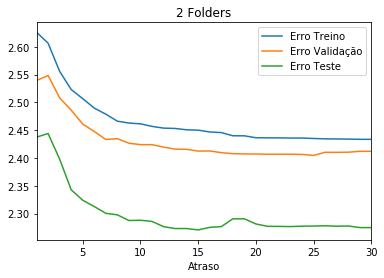

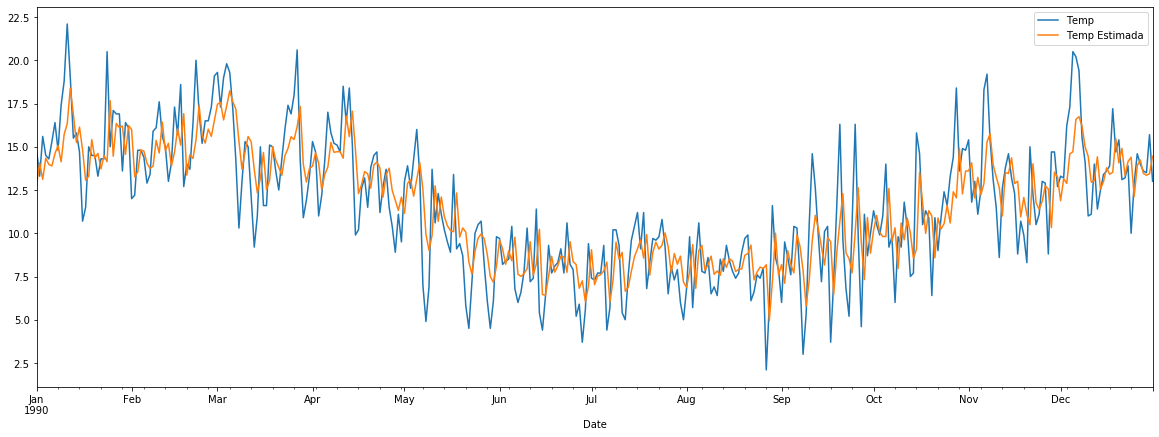

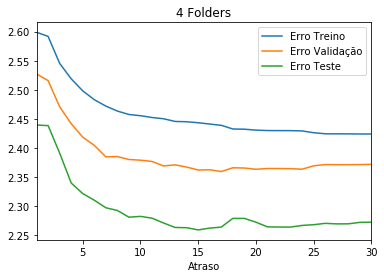

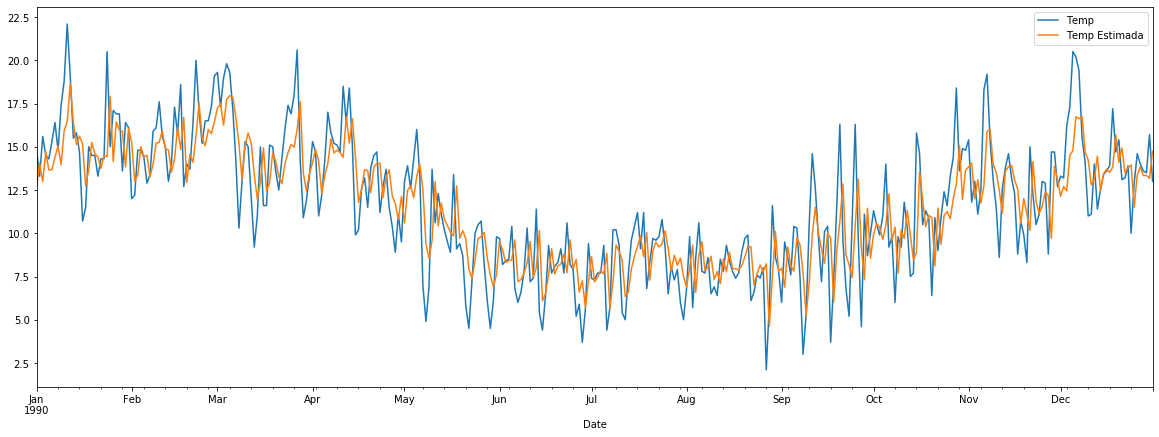

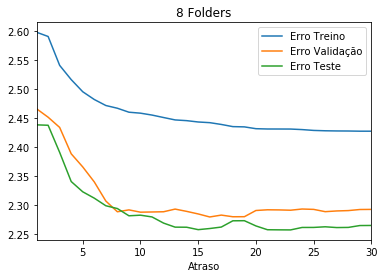

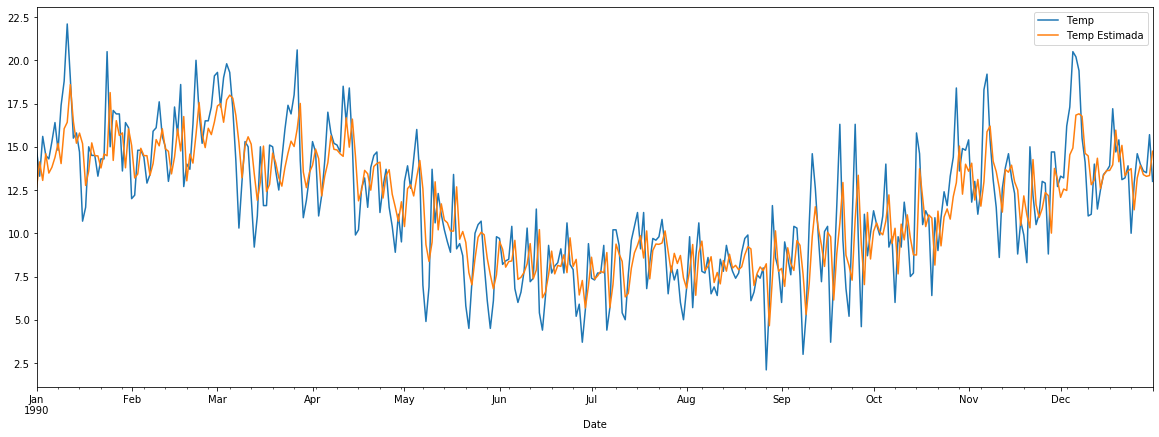

In [46]:
#gera os dados de treino e teste
ano_teste=1990
atrasos=30
lista_folders=[2,4,8]
data_train=data_windowed[data_windowed['Year']!=ano_teste].copy()
data_test=data_windowed[data_windowed['Year']==ano_teste].copy()
for folders in lista_folders:
    #inicializa os parâmetros que vão guardar os resultados
    folder_min=0
    k_min=0
    erro_min=0
    erro_antigo=100000
    #gerando uma coluna com o número de folds a partir de uma distribuição normal e inteiros
    data_train['fold'] = np.random.randint(1,folders+1,size=len(data_train))
    for f in range(1,folders+1):
        lenght=len(data_train[data_train['fold']==f])
    linha=0
    resultados=pd.DataFrame(columns=['Atraso','Folder','Dado Treino','Dado Validação','Matrix','Erro Treino','Erro Validação','Erro Teste'])
    y_tf=data_test.iloc[:,2:3].copy()
    for k in range(1,atrasos+1):
        #dados treino globais
        x_tf=data_test.iloc[:,3:k+4].copy()
        for f in range(1,folders+1):
            linha+=1
            resultados.loc[linha,'Atraso']=k
            resultados.loc[linha,'Folder']=f
            #Dados treino no folder
            x_train=data_train[data_train['fold']!=f]
            x_train=x_train.iloc[:,3:k+4].copy()
            y_train=data_train[data_train['fold']!=f]
            y_train=y_train.iloc[:,2:3].copy()
            resultados.loc[linha,'Dado Treino']=len(x_train)
            #Dados teste no folder
            x_valid=data_train[data_train['fold']==f]
            x_valid=x_valid.iloc[:,3:k+4].copy()
            y_valid=data_train[data_train['fold']==f]
            y_valid=y_valid.iloc[:,2:3].copy()
            resultados.loc[linha,'Dado Validação']=len(x_valid)
            #calculo da inversa
            xtx=(x_train.transpose()).dot(x_train)
            rank=np.linalg.matrix_rank(xtx.values)
            if rank==(k+1):
                message="Sim"
            else:
                message="Não"
            resultados.loc[linha,'Matrix']=message
            #cálculo do vetor w para regressão
            xtxinv=pd.DataFrame(np.linalg.pinv(xtx.values), xtx.columns, xtx.index)
            w=(xtxinv.dot(x_train.transpose())).dot(y_train)
            #erro treino
            yh_train=x_train.dot(w)
            error_train=mt.sqrt(((yh_train-y_train)**2).mean())
            resultados.loc[linha,'Erro Treino']=error_train
            #erro validação
            yh_valid=x_valid.dot(w)
            error_valid=mt.sqrt(((yh_valid-y_valid)**2).mean())
            resultados.loc[linha,'Erro Validação']=error_valid
            #erro global
            yh_tf=x_tf.dot(w)
            error_tf=mt.sqrt(((yh_tf-y_tf)**2).mean())
            resultados.loc[linha,'Erro Teste']=error_tf
            
            if error_valid<erro_antigo:
                erro_min=error_valid
                temp_estimada_min=yh_tf.copy()
                folder_min=f
                k_min=k
                erro_antigo=error_valid
#     print(resultados[['Atraso','Folder','Erro Treino','Erro Validação','Erro Teste']])
    relatorio_lista=[]
    linha=0
    for k in range(1,atrasos+1):
        linha +=1
        x=resultados[resultados['Atraso']==k].copy()
        x=x.astype({'Erro Validação':float})
        linha_dados=x.loc[x['Erro Validação'].idxmin()]
        relatorio_lista.append(linha_dados.values.tolist())
        
    relatorio=pd.DataFrame(relatorio_lista,columns=['Atraso','Folder','Dado Treino','Dado Teste','Matrix','Erro Treino','Erro Validação','Erro Teste'])
#     print(relatorio[['Atraso','Folder','Erro Treino','Erro Validação','Erro Teste']])
    print("Relatorio para {} folders.".format(folders))
    linha_dados=relatorio.loc[relatorio['Erro Validação'].idxmin()]
    print("O número de atrasos que gerou o menor erro de validação foi:{}".format(linha_dados['Atraso']))
    print("Erro Treino:{}".format(linha_dados['Erro Treino']))
    print("Erro Validação:{}".format(linha_dados['Erro Validação']))
    print("Erro Teste:{}".format(linha_dados['Erro Teste']))
    print("Folder:{}".format(linha_dados['Folder']))
#     plotando grafico
    relatorio.plot(x='Atraso',y=['Erro Treino','Erro Validação','Erro Teste'])
    title="{} Folders".format(folders)
    ml.pyplot.title(title)
    print(ml.pyplot.show)
    print(folder_min)
    print(k_min)
    print(erro_min)
    grafico=data_test.iloc[:,1:2].copy()
    print(mt.sqrt(((temp_estimada_min-y_tf)**2).mean()))
    grafico['Temp']=y_tf
    grafico['Temp Estimada']=temp_estimada_min
    print(grafico)
    grafico.plot(x='Date',y=['Temp','Temp Estimada'],figsize=(20,7))
    print(ml.pyplot.show)